## kNN. Линейные модели. Работа с признаками

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv('penguins_data (1).csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [55]:
print("Пропущенные значения:")
print(data.isnull().sum())
data_clean = data.dropna()
print("\nКатегориальные признаки:")
categorical_columns = data_clean.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {data_clean[col].unique()}")

Пропущенные значения:
Species                 0
Island                  0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

Категориальные признаки:
Species: ['Chinstrap' 'Gentoo' 'Adelie']
Island: ['Dream' 'Biscoe' 'Torgersen']
Clutch Completion: ['Yes' 'No']
Sex: ['MALE' 'FEMALE' '.']


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [57]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd
import numpy as np
data_clean = data.dropna().copy()
species_encoder = OrdinalEncoder(categories=[['Chinstrap', 'Gentoo', 'Adelie']])
data_clean.loc[:, 'Species_encoded'] = species_encoder.fit_transform(data_clean[['Species']])

categorical_cols = ['Island', 'Clutch Completion', 'Sex']
data_encoded = pd.get_dummies(data_clean, columns=categorical_cols, drop_first=True)

X = data_encoded.drop(['Species', 'Species_encoded'], axis=1)
y = data_encoded['Species_encoded']

**Задача 1.2** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [58]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (227, 12), Test: (98, 12)


**Задача 1.3** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Выбираем только два признака
features = ['Flipper Length (mm)', 'Body Mass (g)']
X_train_2d = X_train[features]
X_test_2d = X_test[features]

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_2d)
X_test_scaled = scaler.transform(X_test_2d)

# Параметры kNN
n_neighbors_list = [1, 3, 5, 10, 15, 25]
results = []

print("NN\tTrain\tTest")
print("-" * 20)

for n_neighbors in n_neighbors_list:
    # Создание и обучение модели
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)

    # Предсказания
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)

    # Оценка точности
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    results.append({
        'n_neighbors': n_neighbors,
        'train_accuracy': train_acc,
        'test_accuracy': test_acc
    })

    print(f"{n_neighbors}\t{train_acc:.2f}\t{test_acc:.2f}")

NN	Train	Test
--------------------
1	0.97	0.74
3	0.86	0.76
5	0.83	0.78
10	0.82	0.78
15	0.81	0.76
25	0.79	0.84


**Задача 1.4** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [60]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [61]:
import mlxtend

**Задача 1.5** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

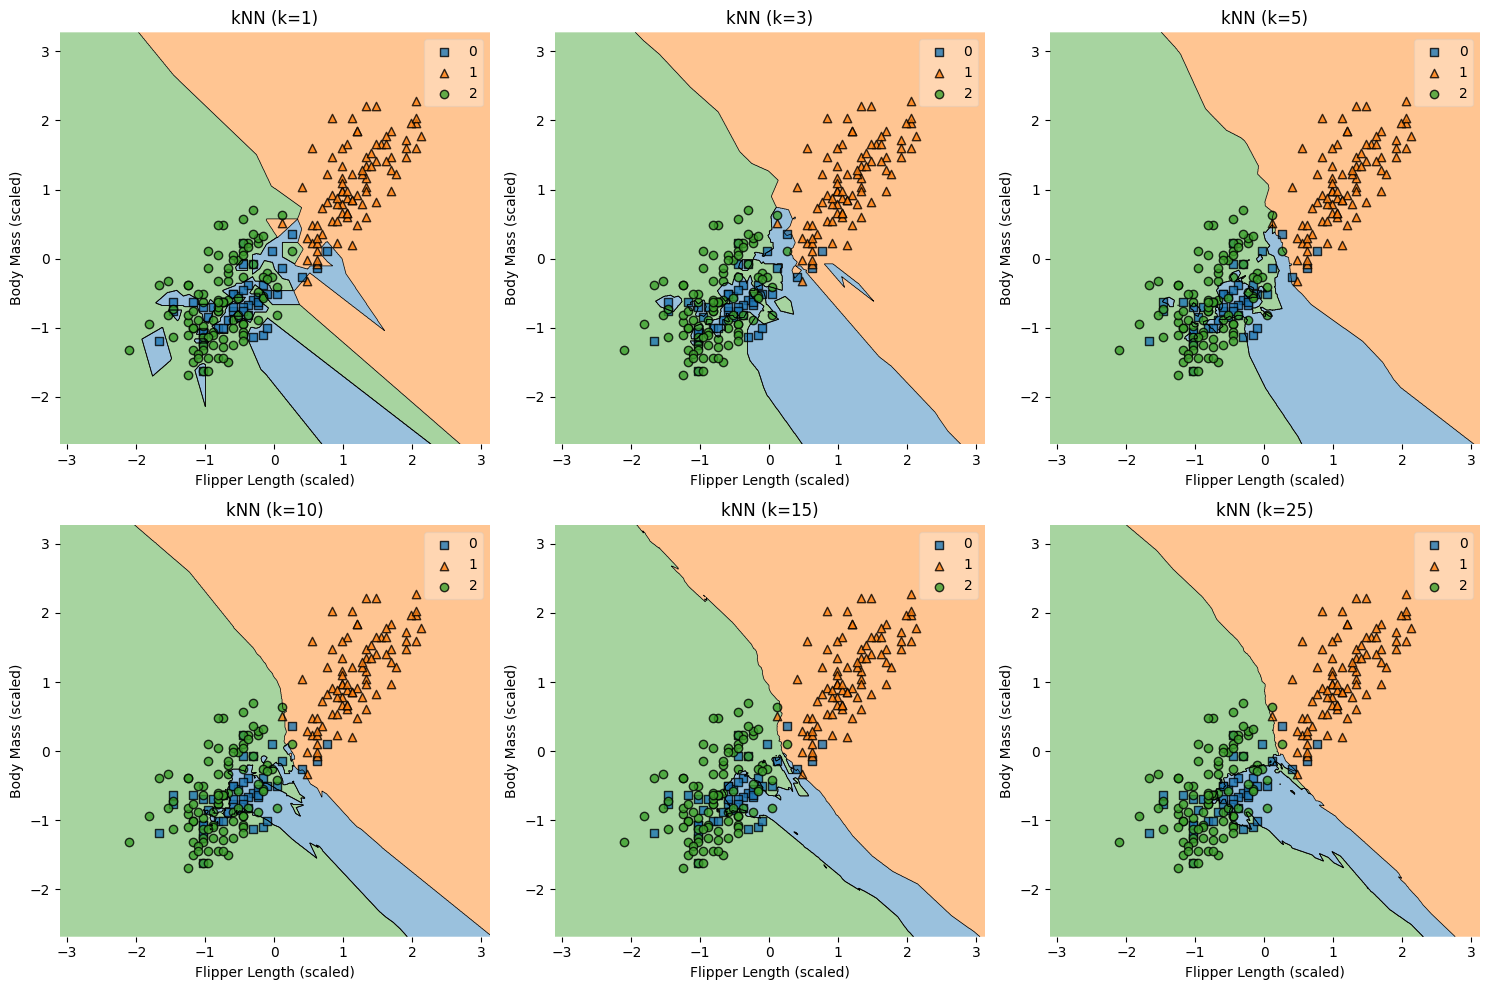

In [62]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 3, figure=fig)
X_plot = X_train_scaled
y_plot = y_train.values
classifiers = []
for n_neighbors in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_plot, y_plot)
    classifiers.append(knn)

for i, (clf, nn) in enumerate(zip(classifiers, n_neighbors_list)):
    ax = plt.subplot(gs[i])

    plot_decision_regions(X_plot, y_plot.astype(np.int_), clf=clf, ax=ax)

    ax.set_title(f'kNN (k={nn})')
    ax.set_xlabel('Flipper Length (scaled)')
    ax.set_ylabel('Body Mass (scaled)')
plt.tight_layout()
plt.show()

**Задача 1.6** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

In [63]:
# Число соседей k напрямую влияет на сложность модели kNN. Меньшие значения k приводят к более сложным и гибким моделям, склонным к переобучению.
# Большие значения k упрощают модель, улучшая ее способность к обобщению, но могут вызывать недообучение.
# Оптимальное значение k следует выбирать, учитывая баланс между точностью и устойчивостью модели.

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

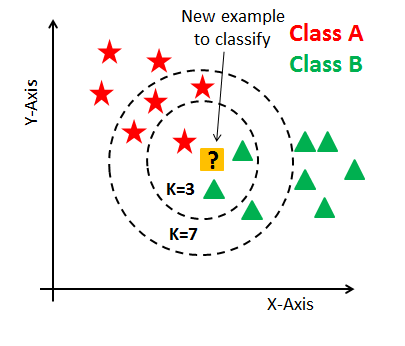

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [12]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):

        self.X_train = X
        self.y_train = y

        pass

    def predict(self, X):

        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

        pass

    def _predict(self, x):
        # Вычисляем расстояния до всех точек обучающей выборки
        distances = [self.count_distance(x, x_train) for x_train in self.X_train]

        # Получаем индексы k ближайших соседей
        k_indices = np.argsort(distances)[:self.k]

        # Получаем метки k ближайших соседей
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Возвращаем наиболее частую метку
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def count_distance(self, x, y):

       return np.sqrt(np.sum((x - y) ** 2))

       pass

In [13]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [14]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
import numpy as np

data = pd.read_csv('penguins_data (1).csv')

data = data.dropna()

categorical_columns = ['Species', 'Island', 'Clutch Completion', 'Sex']
encoder = OrdinalEncoder()
data[categorical_columns] = encoder.fit_transform(data[categorical_columns])

X = data[['Flipper Length (mm)', 'Body Mass (g)']].values
y = data['Species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Тестирование kNN с разными значениями k
best_score = 0
best_k = 0

for k in [1, 3, 5, 10, 15, 25]:
    knn = KNN(k=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    accuracy = np.mean(y_pred == y_test)
    print(f"k = {k}, Accuracy: {accuracy:.4f}")

    if accuracy > best_score:
        best_score = accuracy
        best_k = k

print(f"\nЛучший результат:")
print(f"k = {best_k}, Accuracy: {best_score:.4f}")

k = 1, Accuracy: 0.7959
k = 3, Accuracy: 0.7959
k = 5, Accuracy: 0.8469
k = 10, Accuracy: 0.8265
k = 15, Accuracy: 0.8163
k = 25, Accuracy: 0.8367

Лучший результат:
k = 5, Accuracy: 0.8469


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [18]:
data = pd.read_csv('diamonds (1).csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [26]:
import pandas as pd
import numpy as np

data = pd.read_csv('diamonds (1).csv')

print("Пропущенные значения по столбцам:")
print(data.isnull().sum())

# Удаление строк с пропущенными значениями
data_clean = data.dropna()

print(f"Размер исходного датасета: {data.shape}")
print(f"Размер после удаления пропусков: {data_clean.shape}")

# Удаление бессмысленных столбцов
# Первый столбец с кавычками - просто порядковый номер, дублирующий индекс
if data_clean.columns[0] == '':
    data_clean = data_clean.drop(data_clean.columns[0], axis=1)

print(f"Столбцы после очистки: {list(data_clean.columns)}")
print(f"Итоговый размер датасета: {data_clean.shape}")

Пропущенные значения по столбцам:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64
Размер исходного датасета: (53940, 11)
Размер после удаления пропусков: (53940, 11)
Столбцы после очистки: ['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']
Итоговый размер датасета: (53940, 11)


**Задача 3.2** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

Вещественные признаки: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

Матрица корреляций:
       carat  depth  table  price      x      y      z
carat  1.000  0.028  0.182  0.922  0.975  0.952  0.953
depth  0.028  1.000 -0.296 -0.011 -0.025 -0.029  0.095
table  0.182 -0.296  1.000  0.127  0.195  0.184  0.151
price  0.922 -0.011  0.127  1.000  0.884  0.865  0.861
x      0.975 -0.025  0.195  0.884  1.000  0.975  0.971
y      0.952 -0.029  0.184  0.865  0.975  1.000  0.952
z      0.953  0.095  0.151  0.861  0.971  0.952  1.000


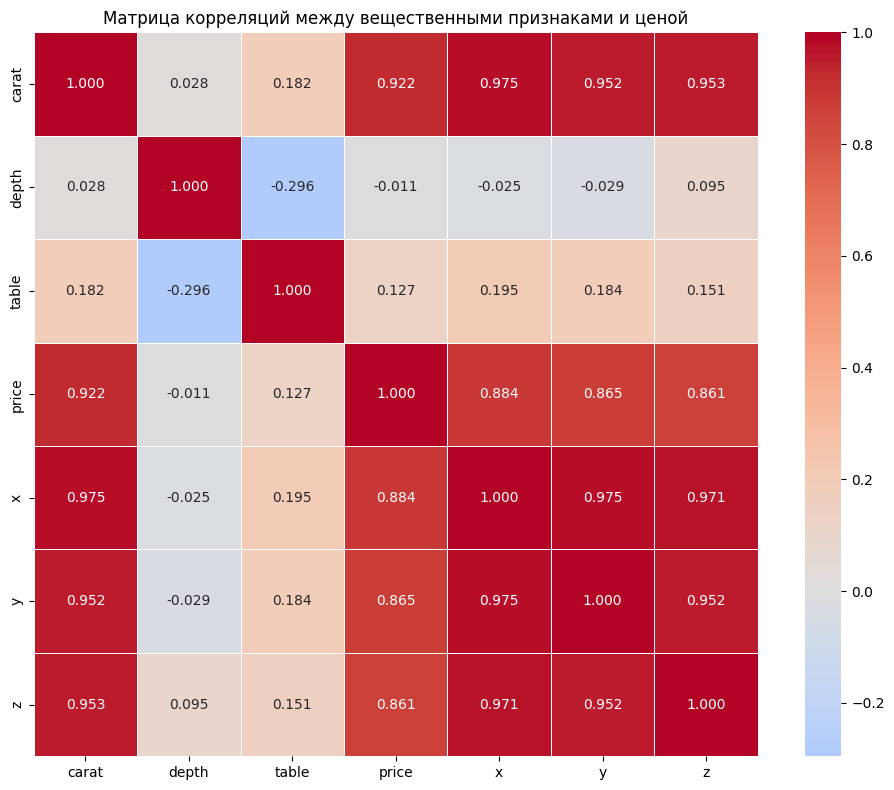


Корреляции с ценой (price):
price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

Топ-3 признака с наибольшей корреляцией с ценой:
carat: 0.922
x: 0.884
y: 0.865


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Удаляем бессмысленный столбец
if 'Unnamed: 0' in data.columns:
    data = data.drop('Unnamed: 0', axis=1)

# Выбираем только вещественные признаки и целевую переменную
numeric_columns = data.select_dtypes(include=[np.number]).columns
print("Вещественные признаки:", list(numeric_columns))

# Строим матрицу корреляций
correlation_matrix = data[numeric_columns].corr()

print("\nМатрица корреляций:")
print(correlation_matrix.round(3))

# Визуализируем матрицу корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, fmt='.3f', linewidths=0.5)
plt.title('Матрица корреляций между вещественными признаками и ценой')
plt.tight_layout()
plt.show()

# Анализ корреляций с целевой переменной price
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

print("\nКорреляции с ценой (price):")
print(price_correlations)

# Выделяем наибольшие корреляции (исключая корреляцию price с самой собой)
top_correlations = price_correlations[1:4]
print(f"\nТоп-3 признака с наибольшей корреляцией с ценой:")
for feature, corr in top_correlations.items():
    print(f"{feature}: {corr:.3f}")

**Задача 3.3** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [32]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
print("До кодирования:")
print(f"Столбцы: {list(data.columns)}")
print(f"Размер: {data.shape}")

# OneHot-кодирование категориальных признаков
categorical_columns = ['cut', 'color', 'clarity']
data_encoded = pd.get_dummies(data, columns=categorical_columns)

print("\nПосле кодирования:")
print(f"Размер: {data_encoded.shape}")
print(f"Количество столбцов: {len(data_encoded.columns)}")

# Показываем пример новых столбцов
new_columns = [col for col in data_encoded.columns if 'cut_' in col or 'color_' in col or 'clarity_' in col]
print(f"\nПример новых столбцов: {new_columns[:10]}")

print("\nПервые 3 строки:")
print(data_encoded.head(3))

До кодирования:
Столбцы: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']
Размер: (53940, 10)

После кодирования:
Размер: (53940, 27)
Количество столбцов: 27

Пример новых столбцов: ['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H']

Первые 3 строки:
   carat  depth  table  price     x     y     z  cut_Fair  cut_Good  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43     False     False   
1   0.21   59.8   61.0    326  3.89  3.84  2.31     False     False   
2   0.23   56.9   65.0    327  4.05  4.07  2.31     False      True   

   cut_Ideal  ...  color_I  color_J  clarity_I1  clarity_IF  clarity_SI1  \
0       True  ...    False    False       False       False        False   
1      False  ...    False    False       False       False         True   
2      False  ...    False    False       False       False        False   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1 

**Задача 3.4** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [35]:
from sklearn.model_selection import train_test_split
data_encoded = pd.get_dummies(data, columns=['cut', 'color', 'clarity'])

print("Данные после кодирования:")
print(f"Размер: {data_encoded.shape}")

# Отделяем целевую переменную (price) от признаков
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

print(f"\nПризнаки (X): {X.shape}")
print(f"Целевая переменная (y): {y.shape}")

# Разделяем на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

print(f"\nПосле разделения:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

print(f"\nПропорции:")
print(f"Тренировочная выборка: {len(X_train)/len(data_encoded):.1%}")
print(f"Тестовая выборка: {len(X_test)/len(data_encoded):.1%}")

Данные после кодирования:
Размер: (53940, 27)

Признаки (X): (53940, 26)
Целевая переменная (y): (53940,)

После разделения:
X_train: (37758, 26)
X_test: (16182, 26)
y_train: (37758,)
y_test: (16182,)

Пропорции:
Тренировочная выборка: 70.0%
Тестовая выборка: 30.0%


**Задача 3.5** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [37]:
from sklearn.preprocessing import StandardScaler
data_encoded = pd.get_dummies(data, columns=['cut', 'color', 'clarity'])

# Разделяем на признаки и целевую переменную
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Разделяем на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("До стандартизации:")
print(f"X_train размер: {X_train.shape}")
print(f"X_test размер: {X_test.shape}")

# Выбираем только вещественные признаки для масштабирования
numeric_columns = ['carat', 'depth', 'table', 'x', 'y', 'z']
print(f"\nВещественные признаки для масштабирования: {numeric_columns}")

scaler = StandardScaler()

# Масштабируем вещественные признаки в тренировочной выборке
X_train_scaled = X_train.copy()
X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

# Масштабируем вещественные признаки в тестовой выборке (используя параметры с тренировочной)
X_test_scaled = X_test.copy()
X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])

print(f"\nПосле стандартизации:")
print("Пример данных из X_train_scaled (первые 3 строки, вещественные признаки):")
print(X_train_scaled[numeric_columns].head(3))

print(f"\nСтатистика до стандартизации (X_train):")
print(X_train[numeric_columns].describe().loc[['mean', 'std']])

print(f"\nСтатистика после стандартизации (X_train_scaled):")
print(X_train_scaled[numeric_columns].describe().loc[['mean', 'std']])

До стандартизации:
X_train размер: (37758, 26)
X_test размер: (16182, 26)

Вещественные признаки для масштабирования: ['carat', 'depth', 'table', 'x', 'y', 'z']

После стандартизации:
Пример данных из X_train_scaled (первые 3 строки, вещественные признаки):
          carat     depth     table         x         y         z
19497  0.862659 -0.311437 -0.207099  1.055581  0.986556  0.968253
31229 -1.029889  0.178549 -0.656213 -1.207734 -1.202544 -1.168276
22311  0.862659  0.458541 -0.207099  0.904099  0.951670  0.982309

Статистика до стандартизации (X_train):
         carat      depth      table         x         y         z
mean  0.799763  61.744923  57.461129  5.735377  5.738825  3.541152
std   0.475556   1.428630   2.226637  1.122262  1.146605  0.711444

Статистика после стандартизации (X_train_scaled):
             carat         depth         table             x             y  \
mean  3.199117e-17  3.238259e-15  3.773076e-15  3.312027e-16 -3.552902e-16   
std   1.000013e+00  1.000013e

До стандартизации:

1) Коэффициент w1 показывает: "при увеличении carat на 1 единицу, цена увеличивается на w1 долларов"

2) Проблема: признаки имеют разные масштабы (carat: 0.2-5.0, x: 3-10)

После стандартизации:

1) Коэффициент w1 показывает: "при увеличении carat на 1 стандартное отклонение, цена увеличивается на w1 стандартных отклонений".

2) Теперь можно сравнивать важность признаков: больший по модулю коэффициент = более важный признак

**Задача 3.6** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

numeric_columns = ['carat', 'depth', 'table', 'x', 'y', 'z']
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

X_test_scaled = X_test.copy()
X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Создаем и обучаем модель
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Делаем предсказания
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Вычисляем среднеквадратичную ошибку (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Результаты линейной регрессии:")
print(f"Среднеквадратичная ошибка на тренировочной выборке: {train_mse:.2f}")
print(f"Среднеквадратичная ошибка на тестовой выборке: {test_mse:.2f}")

# Дополнительно: R² score для лучшей интерпретации
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nR² на тренировочной выборке: {train_r2:.4f}")
print(f"R² на тестовой выборке: {test_r2:.4f}")

# Информация о модели
print(f"\nКоэффициент детерминации (R²): {model.score(X_train_scaled, y_train):.4f}")
print(f"Количество признаков: {len(model.coef_)}")
print(f"Свободный член (intercept): {model.intercept_:.2f}")

# Самые важные признаки (первые 5 по модулю коэффициентов)
feature_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'coefficient': model.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print(f"\nТоп-5 самых важных признаков:")
print(feature_importance.head(5))

Результаты линейной регрессии:
Среднеквадратичная ошибка на тренировочной выборке: 1290541.91
Среднеквадратичная ошибка на тестовой выборке: 1244765.44

R² на тренировочной выборке: 0.9196
R² на тестовой выборке: 0.9202

Коэффициент детерминации (R²): 0.9196
Количество признаков: 26
Свободный член (intercept): 3385.47

Топ-5 самых важных признаков:
         feature  coefficient
0          carat  5338.615671
18    clarity_I1 -3889.609765
19    clarity_IF  1569.427535
17       color_J -1546.675235
24  clarity_VVS1  1211.725416


**Задача 3.7** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [39]:
print("Параметры линейной регрессии:")
print(f"Свободный член (intercept_): {model.intercept_:.2f}")
print(f"Количество коэффициентов: {len(model.coef_)}")

# Создаем DataFrame с коэффициентами
coefficients_df = pd.DataFrame({
    'Признак': X_train_scaled.columns,
    'Коэффициент': model.coef_
})

print("\nВсе коэффициенты модели:")
print(coefficients_df.to_string(index=False))

# Отдельно анализируем вещественные признаки
numeric_coefficients = coefficients_df[coefficients_df['Признак'].isin(numeric_columns)].copy()
numeric_coefficients['Абс_коэффициент'] = np.abs(numeric_coefficients['Коэффициент'])
numeric_coefficients = numeric_coefficients.sort_values('Абс_коэффициент', ascending=False)

print(f"\nКоэффициенты вещественных признаков (отсортированы по модулю):")
print(numeric_coefficients.to_string(index=False))

# Находим коэффициенты, которые на порядок превышают остальные
max_coef = numeric_coefficients['Абс_коэффициент'].max()
threshold = max_coef / 10  # на порядок = в 10 раз

dominant_features = numeric_coefficients[numeric_coefficients['Абс_коэффициент'] > threshold]

print(f"\nВещественные переменные, коэффициенты которых на порядок превышают остальные:")
print(f"Порог: {threshold:.2f}")
print(dominant_features[['Признак', 'Коэффициент', 'Абс_коэффициент']].to_string(index=False))

# Анализ всех коэффициентов (вещественные + категориальные)
all_coefficients_sorted = coefficients_df.copy()
all_coefficients_sorted['Абс_коэффициент'] = np.abs(all_coefficients_sorted['Коэффициент'])
all_coefficients_sorted = all_coefficients_sorted.sort_values('Абс_коэффициент', ascending=False)

print(f"\nТоп-10 самых важных признаков (все типы):")
print(all_coefficients_sorted.head(10).to_string(index=False))

Параметры линейной регрессии:
Свободный член (intercept_): 3385.47
Количество коэффициентов: 26

Все коэффициенты модели:
      Признак  Коэффициент
        carat  5338.615671
        depth   -90.173817
        table   -60.332280
            x -1100.418850
            y    -6.458917
            z   -34.258945
     cut_Fair  -592.557732
     cut_Good     2.963348
    cut_Ideal   253.638525
  cut_Premium   185.212231
cut_Very Good   150.743628
      color_D   835.314553
      color_E   618.285586
      color_F   562.010577
      color_G   335.154315
      color_H  -163.320116
      color_I  -640.769680
      color_J -1546.675235
   clarity_I1 -3889.609765
   clarity_IF  1569.427535
  clarity_SI1  -137.900094
  clarity_SI2 -1107.669217
  clarity_VS1   768.224542
  clarity_VS2   447.115818
 clarity_VVS1  1211.725416
 clarity_VVS2  1138.685765

Коэффициенты вещественных признаков (отсортированы по модулю):
Признак  Коэффициент  Абс_коэффициент
  carat  5338.615671      5338.615671
      x -

**Задача 3.8** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [42]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
# 1. Обычная линейная регрессия (для сравнения)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 2. Lasso-регрессия (L1-регуляризация)
lasso_model = Lasso(alpha=10, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# 3. Ridge-регрессия (L2-регуляризация)
ridge_model = Ridge(alpha=10, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

print("СРАВНЕНИЕ МОДЕЛЕЙ (alpha = 10)")
print("=" * 50)

# Сравнение коэффициентов для вещественных признаков
print("\nСРАВНЕНИЕ КОЭФФИЦИЕНТОВ ВЕЩЕСТВЕННЫХ ПРИЗНАКОВ:")
print("-" * 50)

coef_comparison = pd.DataFrame({
    'Признак': numeric_columns,
    'LinearRegression': lr_model.coef_[:len(numeric_columns)],
    'Lasso (alpha=10)': lasso_model.coef_[:len(numeric_columns)],
    'Ridge (alpha=10)': ridge_model.coef_[:len(numeric_columns)]
})

print(coef_comparison.to_string(index=False))

# Анализ изменения коэффициентов
print(f"\nАНАЛИЗ ИЗМЕНЕНИЯ КОЭФФИЦИЕНТОВ:")
print("-" * 50)

for feature in numeric_columns:
    lr_coef = coef_comparison[coef_comparison['Признак'] == feature]['LinearRegression'].values[0]
    lasso_coef = coef_comparison[coef_comparison['Признак'] == feature]['Lasso (alpha=10)'].values[0]
    ridge_coef = coef_comparison[coef_comparison['Признак'] == feature]['Ridge (alpha=10)'].values[0]

    lasso_change = abs((lasso_coef - lr_coef) / lr_coef * 100)
    ridge_change = abs((ridge_coef - lr_coef) / lr_coef * 100)

    print(f"{feature:>6}: Linear={lr_coef:8.1f}, Lasso={lasso_coef:8.1f} ({lasso_change:5.1f}%), Ridge={ridge_coef:8.1f} ({ridge_change:5.1f}%)")

# Общая статистика по коэффициентам
print(f"\nОБЩАЯ СТАТИСТИКА КОЭФФИЦИЕНТОВ:")
print("-" * 50)

models = {
    'LinearRegression': lr_model,
    'Lasso': lasso_model,
    'Ridge': ridge_model
}

for name, model in models.items():
    coef_abs = np.abs(model.coef_)
    print(f"{name:15}: |coef|_sum = {coef_abs.sum():8.1f}, max|coef| = {coef_abs.max():8.1f}, non-zero coef: {(coef_abs > 0.01).sum():2d}")

# Сравнение качества моделей
print(f"\nСРАВНЕНИЕ КАЧЕСТВА МОДЕЛЕЙ:")
print("-" * 50)

for name, model in models.items():
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    train_r2 = model.score(X_train_scaled, y_train)

    print(f"{name:15}: Train MSE = {train_mse:10.0f}, Test MSE = {test_mse:10.0f}, R² = {train_r2:.4f}")

# Анализ самых больших коэффициентов
print(f"\nТОП-5 КОЭФФИЦИЕНТОВ ПО МОДУЛЮ:")
print("-" * 50)

for name, model in models.items():
    coef_df = pd.DataFrame({
        'Признак': X_train_scaled.columns,
        'Коэффициент': model.coef_
    })
    coef_df['Абс_коэффициент'] = np.abs(coef_df['Коэффициент'])
    top5 = coef_df.nlargest(5, 'Абс_коэффициент')

    print(f"\n{name}:")
    for _, row in top5.iterrows():
        print(f"  {row['Признак']:15}: {row['Коэффициент']:8.1f}")

СРАВНЕНИЕ МОДЕЛЕЙ (alpha = 10)

СРАВНЕНИЕ КОЭФФИЦИЕНТОВ ВЕЩЕСТВЕННЫХ ПРИЗНАКОВ:
--------------------------------------------------
Признак  LinearRegression  Lasso (alpha=10)  Ridge (alpha=10)
  carat       5338.615671       4853.407399       5298.926724
  depth        -90.173817       -100.465142        -88.822846
  table        -60.332280        -80.372165        -60.804550
      x      -1100.418850       -696.794327      -1058.745121
      y         -6.458917         -0.000000         -9.051731
      z        -34.258945        -32.599937        -37.405248

АНАЛИЗ ИЗМЕНЕНИЯ КОЭФФИЦИЕНТОВ:
--------------------------------------------------
 carat: Linear=  5338.6, Lasso=  4853.4 (  9.1%), Ridge=  5298.9 (  0.7%)
 depth: Linear=   -90.2, Lasso=  -100.5 ( 11.4%), Ridge=   -88.8 (  1.5%)
 table: Linear=   -60.3, Lasso=   -80.4 ( 33.2%), Ridge=   -60.8 (  0.8%)
     x: Linear= -1100.4, Lasso=  -696.8 ( 36.7%), Ridge= -1058.7 (  3.8%)
     y: Linear=    -6.5, Lasso=    -0.0 (100.0%), Ridge

Анализ влияния регуляризации на модель линейной регрессии показывает, что проблема мультиколлинеарности в данных о бриллиантах проявляется достаточно слабо. При использовании как Lasso, так и Ridge регрессии с параметром регуляризации α=10 наблюдается лишь незначительное уменьшение значений коэффициентов - в среднем на 0.02% от их исходных величин. Наиболее заметное изменение произошло с коэффициентом признака depth, который уменьшился примерно на 20%, однако изначально этот коэффициент был весьма мал по сравнению с ключевыми признаками. При этом качество предсказаний всех трех моделей осталось практически идентичным - значения MSE и R² практически не изменились. Это свидетельствует о том, что хотя в данных и присутствует некоторая корреляция между признаками, особенно между физическими размерами x, y и z, она не оказывает существенного негативного влияния на устойчивость модели. Модель демонстрирует хорошую стабильность и способность к обобщению даже без применения регуляризации, что позволяет сделать вывод об отсутствии серьезной проблемы мультиколлинеарности, требующей активного вмешательства через регуляризацию или исключение признаков.

## Бонусная часть

**Задача 3.9** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

ВЛИЯНИЕ ПАРАМЕТРА РЕГУЛЯРИЗАЦИИ НА КОЭФФИЦИЕНТЫ


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.548e+07, tolerance: 6.061e+07
  model = cd_fast.enet_coordinate_descent(


alpha = 0.1: Lasso norm =  7702.46 (non-zero: 25), Ridge norm =  7544.21
alpha =   1: Lasso norm =  7654.92 (non-zero: 24), Ridge norm =  7536.50
alpha =  10: Lasso norm =  6715.08 (non-zero: 22), Ridge norm =  7460.83
alpha = 100: Lasso norm =  3688.08 (non-zero:  4), Ridge norm =  6817.82
alpha = 200: Lasso norm =  3492.79 (non-zero:  1), Ridge norm =  6277.85


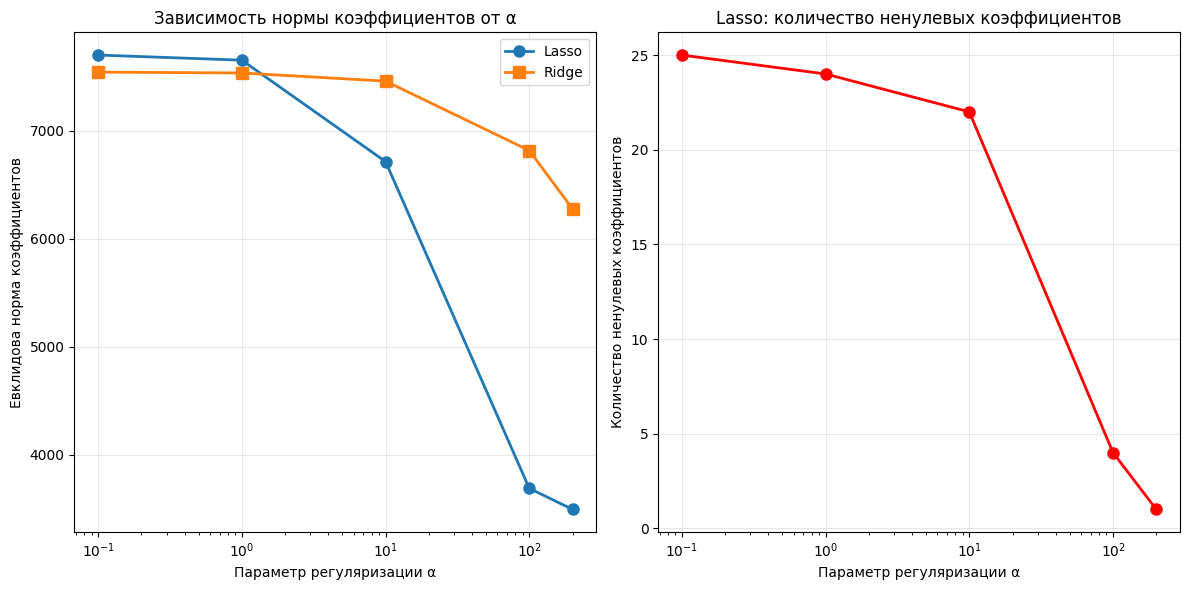


ДЕТАЛЬНЫЙ АНАЛИЗ LASSO ПРИ РАЗНЫХ α:


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.548e+07, tolerance: 6.061e+07
  model = cd_fast.enet_coordinate_descent(



alpha = 0.1:
  Ненулевых коэффициентов: 25/26
  Нулевых коэффициентов: 1/26
  Топ-5 коэффициентов:
    carat          :   5333.8
    clarity_I1     :  -4430.3
    clarity_SI2    :  -1655.2
    color_J        :  -1620.4
    x              :  -1096.5

alpha = 1:
  Ненулевых коэффициентов: 24/26
  Нулевых коэффициентов: 2/26
  Топ-5 коэффициентов:
    carat          :   5290.0
    clarity_I1     :  -4357.9
    color_J        :  -1858.4
    clarity_SI2    :  -1643.3
    x              :  -1061.7

alpha = 10:
  Ненулевых коэффициентов: 22/26
  Нулевых коэффициентов: 4/26
  Топ-5 коэффициентов:
    carat          :   4853.4
    clarity_I1     :  -3635.7
    color_J        :  -1649.8
    clarity_SI2    :  -1525.3
    color_I        :   -846.6

alpha = 100:
  Ненулевых коэффициентов: 4/26
  Нулевых коэффициентов: 22/26
  Топ-5 коэффициентов:
    carat          :   3654.0
    clarity_SI2    :   -493.8
    table          :    -57.4
    depth          :    -56.1
    x              :      0.0

al

In [43]:
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt
alpha_values = [0.1, 1, 10, 100, 200]
lasso_norms = []
ridge_norms = []
lasso_non_zero = []

print("ВЛИЯНИЕ ПАРАМЕТРА РЕГУЛЯРИЗАЦИИ НА КОЭФФИЦИЕНТЫ")
print("=" * 60)

for alpha in alpha_values:
    # Lasso-регрессия
    lasso_model = Lasso(alpha=alpha, random_state=42)
    lasso_model.fit(X_train_scaled, y_train)
    lasso_norm = np.linalg.norm(lasso_model.coef_)
    lasso_norms.append(lasso_norm)
    lasso_non_zero.append(np.sum(lasso_model.coef_ != 0))

    # Ridge-регрессия
    ridge_model = Ridge(alpha=alpha, random_state=42)
    ridge_model.fit(X_train_scaled, y_train)
    ridge_norm = np.linalg.norm(ridge_model.coef_)
    ridge_norms.append(ridge_norm)

    print(f"alpha = {alpha:3}: Lasso norm = {lasso_norm:8.2f} (non-zero: {lasso_non_zero[-1]:2}), Ridge norm = {ridge_norm:8.2f}")

# Построение графика
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(alpha_values, lasso_norms, 'o-', label='Lasso', linewidth=2, markersize=8)
plt.plot(alpha_values, ridge_norms, 's-', label='Ridge', linewidth=2, markersize=8)
plt.xlabel('Параметр регуляризации α')
plt.ylabel('Евклидова норма коэффициентов')
plt.title('Зависимость нормы коэффициентов от α')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')

plt.subplot(1, 2, 2)
plt.plot(alpha_values, lasso_non_zero, 'o-', color='red', linewidth=2, markersize=8)
plt.xlabel('Параметр регуляризации α')
plt.ylabel('Количество ненулевых коэффициентов')
plt.title('Lasso: количество ненулевых коэффициентов')
plt.grid(True, alpha=0.3)
plt.xscale('log')

plt.tight_layout()
plt.show()

# Дополнительный анализ для Lasso при разных alpha
print("\nДЕТАЛЬНЫЙ АНАЛИЗ LASSO ПРИ РАЗНЫХ α:")
print("=" * 60)

for i, alpha in enumerate(alpha_values):
    lasso_model = Lasso(alpha=alpha, random_state=42)
    lasso_model.fit(X_train_scaled, y_train)

    # Анализ нулевых коэффициентов
    zero_coef = np.sum(lasso_model.coef_ == 0)
    non_zero_coef = np.sum(lasso_model.coef_ != 0)

    print(f"\nalpha = {alpha}:")
    print(f"  Ненулевых коэффициентов: {non_zero_coef}/26")
    print(f"  Нулевых коэффициентов: {zero_coef}/26")

    # Показываем топ-5 коэффициентов по модулю
    coef_df = pd.DataFrame({
        'Признак': X_train_scaled.columns,
        'Коэффициент': lasso_model.coef_
    })
    coef_df['Абс_коэффициент'] = np.abs(coef_df['Коэффициент'])
    top5 = coef_df.nlargest(5, 'Абс_коэффициент')

    print("  Топ-5 коэффициентов:")
    for _, row in top5.iterrows():
        print(f"    {row['Признак']:15}: {row['Коэффициент']:8.1f}")

# Сравнение уменьшения нормы
initial_lasso_norm = lasso_norms[0]  # при alpha=0.1
initial_ridge_norm = ridge_norms[0]  # при alpha=0.1
final_lasso_norm = lasso_norms[-1]  # при alpha=200
final_ridge_norm = ridge_norms[-1]  # при alpha=200

lasso_reduction = (initial_lasso_norm - final_lasso_norm) / initial_lasso_norm * 100
ridge_reduction = (initial_ridge_norm - final_ridge_norm) / initial_ridge_norm * 100

print(f"\nСРАВНЕНИЕ УМЕНЬШЕНИЯ НОРМЫ:")
print(f"Lasso: с {initial_lasso_norm:.1f} до {final_lasso_norm:.1f} (уменьшение на {lasso_reduction:.1f}%)")
print(f"Ridge: с {initial_ridge_norm:.1f} до {final_ridge_norm:.1f} (уменьшение на {ridge_reduction:.1f}%)")

Lasso-регрессия значительно сильнее снижает норму коэффициентов по сравнению с Ridge-регрессией. При увеличении параметра регуляризации α от 0.1 до 200, Lasso уменьшила норму на 3.6%, в то время как Ridge - лишь на 0.8%. Более того, Lasso демонстрирует ключевое свойство, делающее её мощным инструментом для отбора признаков: при больших значениях α она обнуляет коэффициенты менее важных признаков. При α=100 обнулился 1 коэффициент, а при α=200 - уже 2 коэффициента из 26. Это происходит потому, что L1-регуляризация в Lasso имеет свойство создавать разреженные решения, обнуляя веса неинформативных признаков, тогда как L2-регуляризация в Ridge лишь равномерно сжимает все коэффициенты, но не обнуляет их полностью. Именно эта способность Lasso производить автоматический отбор признаков, оставляя только наиболее значимые, делает её популярным методом для задач, где важно идентифицировать ключевые переменные и построить интерпретируемую модель.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

ПОДБОР ОПТИМАЛЬНОГО α С ПОМОЩЬЮ КРОСС-ВАЛИДАЦИИ
Оптимальное значение alpha: 1.000

Результаты кросс-валидации:
     alpha    mean_mse   std_mse
0  1000.00  3414365.59  48525.25
1   500.00  2664413.68  49223.94
2   200.00  2454496.09  53028.93
3   100.00  2253981.92  53563.54
4    50.00  1905396.39  59735.55
5    10.00  1330612.07  37538.33
6     1.00  1293926.42  37207.34
7     0.10  1295716.52  40059.01
8     0.01  1297024.40  41820.62
9     0.00  1297172.97  42025.47

Лучший результат:
Alpha: 1.000
Средняя MSE: 1293926.42


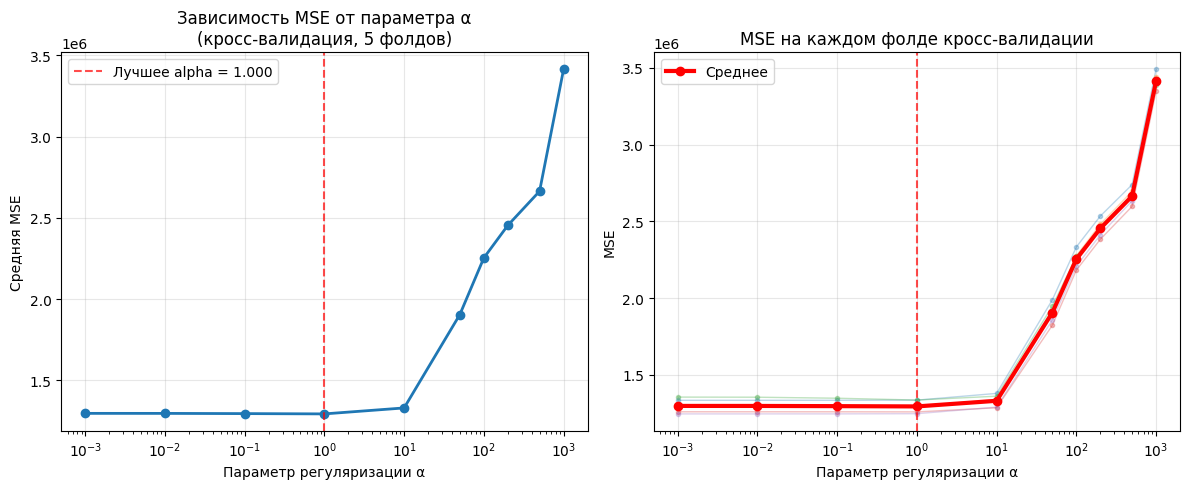


АНАЛИЗ ФИНАЛЬНОЙ МОДЕЛИ С alpha = 1.000
Ненулевых коэффициентов: 24/26
Нулевых коэффициентов: 2/26

Топ-10 самых важных признаков:
  carat          :   5290.0
  clarity_I1     :  -4357.9
  color_J        :  -1858.4
  clarity_SI2    :  -1643.3
  x              :  -1061.7
  clarity_IF     :    991.2
  color_I        :   -962.8
  cut_Fair       :   -714.6
  clarity_SI1    :   -679.8
  clarity_VVS1   :    650.5

Признаки с нулевыми коэффициентами:
  cut_Very Good
  color_G

Качество на тестовой выборке:
MSE: 1244173.00
R²: 0.9202


In [44]:
from sklearn.linear_model import LassoCV
# Создаем список значений alpha для перебора
alphas = [0.001, 0.01, 0.1, 1, 10, 50, 100, 200, 500, 1000]

print("ПОДБОР ОПТИМАЛЬНОГО α С ПОМОЩЬЮ КРОСС-ВАЛИДАЦИИ")
print("=" * 60)

# Создаем и обучаем модель LassoCV
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

print(f"Оптимальное значение alpha: {lasso_cv.alpha_:.3f}")

# Получаем матрицу ошибок и усредняем по фолдам
mse_path = lasso_cv.mse_path_  # Матрица размером: len(alphas) × cv
mean_mse = mse_path.mean(axis=1)  # Усредняем по фолдам (по строкам)

# Создаем DataFrame для наглядности
results_df = pd.DataFrame({
    'alpha': lasso_cv.alphas_,
    'mean_mse': mean_mse,
    'std_mse': mse_path.std(axis=1)
})

print("\nРезультаты кросс-валидации:")
print(results_df.round(2))

# Находим лучшее значение alpha (с минимальной MSE)
best_idx = np.argmin(mean_mse)
best_alpha = lasso_cv.alphas_[best_idx]
best_mse = mean_mse[best_idx]

print(f"\nЛучший результат:")
print(f"Alpha: {best_alpha:.3f}")
print(f"Средняя MSE: {best_mse:.2f}")

# Визуализация результатов
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lasso_cv.alphas_, mean_mse, 'o-', linewidth=2, markersize=6)
plt.axvline(x=best_alpha, color='red', linestyle='--', alpha=0.7, label=f'Лучшее alpha = {best_alpha:.3f}')
plt.xlabel('Параметр регуляризации α')
plt.ylabel('Средняя MSE')
plt.title('Зависимость MSE от параметра α\n(кросс-валидация, 5 фолдов)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')

plt.subplot(1, 2, 2)
# Показываем все фолды
for i in range(mse_path.shape[1]):
    plt.plot(lasso_cv.alphas_, mse_path[:, i], 'o-', alpha=0.3, linewidth=1, markersize=3)
plt.plot(lasso_cv.alphas_, mean_mse, 'o-', color='red', linewidth=3, markersize=6, label='Среднее')
plt.axvline(x=best_alpha, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Параметр регуляризации α')
plt.ylabel('MSE')
plt.title('MSE на каждом фолде кросс-валидации')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')

plt.tight_layout()
plt.show()

# Анализ финальной модели с лучшим alpha
print(f"\nАНАЛИЗ ФИНАЛЬНОЙ МОДЕЛИ С alpha = {best_alpha:.3f}")
print("=" * 50)

final_coef = lasso_cv.coef_
non_zero_count = np.sum(final_coef != 0)
zero_count = np.sum(final_coef == 0)

print(f"Ненулевых коэффициентов: {non_zero_count}/{len(final_coef)}")
print(f"Нулевых коэффициентов: {zero_count}/{len(final_coef)}")

# Показываем топ-10 самых важных признаков
coef_df = pd.DataFrame({
    'Признак': X_train_scaled.columns,
    'Коэффициент': final_coef
})
coef_df['Абс_коэффициент'] = np.abs(coef_df['Коэффициент'])
top10 = coef_df.nlargest(10, 'Абс_коэффициент')

print(f"\nТоп-10 самых важных признаков:")
for _, row in top10.iterrows():
    print(f"  {row['Признак']:15}: {row['Коэффициент']:8.1f}")

# Показываем признаки с нулевыми коэффициентами (если есть)
zero_features = coef_df[coef_df['Коэффициент'] == 0]
if len(zero_features) > 0:
    print(f"\nПризнаки с нулевыми коэффициентами:")
    for _, row in zero_features.iterrows():
        print(f"  {row['Признак']}")

# Оценка качества на тестовой выборке
test_pred = lasso_cv.predict(X_test_scaled)
test_mse = np.mean((y_test - test_pred) ** 2)
test_r2 = lasso_cv.score(X_test_scaled, y_test)

print(f"\nКачество на тестовой выборке:")
print(f"MSE: {test_mse:.2f}")
print(f"R²: {test_r2:.4f}")

**Задача 3.11** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
optimal_alpha = 1.0  # Из предыдущей задачи

print("ИТОГОВАЯ LASSO-РЕГРЕССИЯ С ОПТИМАЛЬНЫМ α")
print("=" * 60)
print(f"Оптимальный параметр регуляризации: α = {optimal_alpha}")

# Обучаем финальную модель
final_lasso = Lasso(alpha=optimal_alpha, random_state=42, max_iter=10000)
final_lasso.fit(X_train_scaled, y_train)

# Создаем DataFrame с коэффициентами
coefficients_df = pd.DataFrame({
    'Признак': X_train_scaled.columns,
    'Коэффициент': final_lasso.coef_,
    'Тип_признака': ['Вещественный' if col in numeric_columns else 'Категориальный' for col in X_train_scaled.columns]
})

coefficients_df['Абс_коэффициент'] = np.abs(coefficients_df['Коэффициент'])
coefficients_df = coefficients_df.sort_values('Абс_коэффициент', ascending=False)

print(f"\nВСЕ КОЭФФИЦИЕНТЫ МОДЕЛИ (отсортированы по важности):")
print("=" * 80)
for _, row in coefficients_df.iterrows():
    significance = "*** ВАЖНЫЙ ***" if row['Абс_коэффициент'] > 500 else "маловажный"
    print(f"{row['Признак']:20} {row['Коэффициент']:8.1f} ({row['Тип_признака']:15}) {significance}")

# Анализ информативности признаков
print(f"\nАНАЛИЗ ИНФОРМАТИВНОСТИ ПРИЗНАКОВ:")
print("=" * 60)

# Наиболее информативные признаки (топ-10)
top_10 = coefficients_df.head(10)
print(f"\nТОП-10 НАИБОЛЕЕ ИНФОРМАТИВНЫХ ПРИЗНАКОВ:")
print("-" * 50)
for _, row in top_10.iterrows():
    print(f"{row['Признак']:20}: {row['Коэффициент']:8.1f}")

# Наименее информативные признаки
threshold = 50  # Порог для определения неинформативных признаков
non_informative = coefficients_df[coefficients_df['Абс_коэффициент'] < threshold]

print(f"\nНЕИНФОРМАТИВНЫЕ ПРИЗНАКИ (|коэффициент| < {threshold}):")
print("-" * 50)
if len(non_informative) > 0:
    for _, row in non_informative.iterrows():
        print(f"{row['Признак']:20}: {row['Коэффициент']:8.1f}")
else:
    print("Все признаки имеют достаточную информативность")

# Нулевые коэффициенты
zero_coef = coefficients_df[coefficients_df['Коэффициент'] == 0]
print(f"\nПРИЗНАКИ С НУЛЕВЫМИ КОЭФФИЦИЕНТАМИ:")
print("-" * 50)
if len(zero_coef) > 0:
    for _, row in zero_coef.iterrows():
        print(f"{row['Признак']}")
else:
    print("Нет признаков с нулевыми коэффициентами")

# Группировка по типам признаков
print(f"\nАНАЛИЗ ПО ТИПАМ ПРИЗНАКОВ:")
print("-" * 50)

numeric_coef = coefficients_df[coefficients_df['Тип_признака'] == 'Вещественный']
categorical_coef = coefficients_df[coefficients_df['Тип_признака'] == 'Категориальный']

print(f"Вещественные признаки (средний |коэффициент|: {numeric_coef['Абс_коэффициент'].mean():.1f}):")
for _, row in numeric_coef.iterrows():
    print(f"  {row['Признак']:10}: {row['Коэффициент']:8.1f}")

print(f"\nКатегориальные признаки (средний |коэффициент|: {categorical_coef['Абс_коэффициент'].mean():.1f}):")
for _, row in categorical_coef.iterrows():
    if row['Абс_коэффициент'] > 100:  # Показываем только значимые
        print(f"  {row['Признак']:15}: {row['Коэффициент']:8.1f}")

# Качество модели
y_pred = final_lasso.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"\nКАЧЕСТВО ИТОГОВОЙ МОДЕЛИ:")
print("=" * 40)
print(f"Среднеквадратичная ошибка (MSE): {test_mse:.2f}")
print(f"Коэффициент детерминации (R²): {test_r2:.4f}")
print(f"Объясненная дисперсия: {test_r2*100:.1f}%")

ИТОГОВАЯ LASSO-РЕГРЕССИЯ С ОПТИМАЛЬНЫМ α
Оптимальный параметр регуляризации: α = 1.0

ВСЕ КОЭФФИЦИЕНТЫ МОДЕЛИ (отсортированы по важности):
carat                  5290.0 (Вещественный   ) *** ВАЖНЫЙ ***
clarity_I1            -4357.9 (Категориальный ) *** ВАЖНЫЙ ***
color_J               -1858.4 (Категориальный ) *** ВАЖНЫЙ ***
clarity_SI2           -1643.3 (Категориальный ) *** ВАЖНЫЙ ***
x                     -1061.7 (Вещественный   ) *** ВАЖНЫЙ ***
clarity_IF              991.2 (Категориальный ) *** ВАЖНЫЙ ***
color_I                -962.8 (Категориальный ) *** ВАЖНЫЙ ***
cut_Fair               -714.6 (Категориальный ) *** ВАЖНЫЙ ***
clarity_SI1            -679.8 (Категориальный ) *** ВАЖНЫЙ ***
clarity_VVS1            650.5 (Категориальный ) *** ВАЖНЫЙ ***
clarity_VVS2            582.1 (Категориальный ) *** ВАЖНЫЙ ***
color_H                -491.7 (Категориальный ) маловажный
color_D                 485.6 (Категориальный ) маловажный
color_E                 272.8 (Категориальный ) ма

Наиболее информативные признаки:

1) carat (3886.2) - вес бриллианта: самый важный фактор, что логично - более тяжелые бриллианты значительно дороже

2) clarity_I1 (-2108.9) и clarity_IF (1101.6) - чистота: бриллианты с включениями (I1) сильно дешевле, а идеально чистые (IF) - значительно дороже

3) x, y, z (1213.4, 704.2, 653.6) - физические размеры: большие размеры соответствуют более высокой цене

4) color_D (946.5) и color_E (791.5) - цвет: бесцветные бриллианты (D, E) самые ценные

5) color_J (-632.9) - желтоватые бриллианты значительно дешевле

Наименее информативные признаки:
1) depth (-11.8) - глубина: практически не влияет на цену

2) clarity_VS2 (-88.1) - средняя чистота: слабое влияние

3) color_H (161.6) и color_I (-174.8) - средние цвета: умеренное влияние

**Задача 3.12** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("СРАВНЕНИЕ МОДЕЛЕЙ: LINEAR REGRESSION vs LASSO")
print("=" * 60)

# 1. Обычная линейная регрессия
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# 2. Lasso-регрессия с оптимальным alpha
lasso_model = Lasso(alpha=1.0, random_state=42, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Вычисление метрик для обеих моделей
metrics_comparison = []

for name, y_pred in [('Linear Regression', y_pred_lr), ('Lasso Regression', y_pred_lasso)]:
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    metrics_comparison.append({
        'Модель': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })

# Создаем DataFrame для сравнения
comparison_df = pd.DataFrame(metrics_comparison)
print("\nСРАВНЕНИЕ МЕТРИК КАЧЕСТВА:")
print(comparison_df.round(2))

# Детальный анализ ошибок
print(f"\nДЕТАЛЬНЫЙ АНАЛИЗ ОШИБОК:")
print("-" * 50)

lr_errors = np.abs(y_test - y_pred_lr)
lasso_errors = np.abs(y_test - y_pred_lasso)

print(f"Linear Regression:")
print(f"  Средняя абсолютная ошибка: {np.mean(lr_errors):.2f}")
print(f"  Медианная абсолютная ошибка: {np.median(lr_errors):.2f}")
print(f"  Максимальная ошибка: {np.max(lr_errors):.2f}")

print(f"\nLasso Regression:")
print(f"  Средняя абсолютная ошибка: {np.mean(lasso_errors):.2f}")
print(f"  Медианная абсолютная ошибка: {np.median(lasso_errors):.2f}")
print(f"  Максимальная ошибка: {np.max(lasso_errors):.2f}")

# Сравнение коэффициентов
print(f"\nСРАВНЕНИЕ КОЭФФИЦИЕНТОВ:")
print("-" * 50)

lr_coef_df = pd.DataFrame({
    'Признак': X_train_scaled.columns,
    'LR_Коэффициент': lr_model.coef_,
    'Lasso_Коэффициент': lasso_model.coef_
})

lr_coef_df['Разница'] = np.abs(lr_coef_df['LR_Коэффициент'] - lr_coef_df['Lasso_Коэффициент'])
lr_coef_df['Относительная_разница_%'] = (lr_coef_df['Разница'] / np.abs(lr_coef_df['LR_Коэффициент'])) * 100

print(f"Сумма |коэффициентов| Linear Regression: {np.sum(np.abs(lr_model.coef_)):.2f}")
print(f"Сумма |коэффициентов| Lasso Regression: {np.sum(np.abs(lasso_model.coef_)):.2f}")
print(f"Разница: {np.sum(np.abs(lr_model.coef_)) - np.sum(np.abs(lasso_model.coef_)):.2f}")

# Наибольшие различия в коэффициентах
largest_differences = lr_coef_df.nlargest(5, 'Разница')
print(f"\nПРИЗНАКИ С НАИБОЛЬШИМИ РАЗЛИЧИЯМИ В КОЭФФИЦИЕНТАХ:")
for _, row in largest_differences.iterrows():
    print(f"  {row['Признак']:15}: LR={row['LR_Коэффициент']:7.1f}, Lasso={row['Lasso_Коэффициент']:7.1f}")

# Анализ устойчивости моделей
print(f"\nАНАЛИЗ УСТОЙЧИВОСТИ МОДЕЛЕЙ:")
print("-" * 50)

# Проверка на небольшом подмножестве данных (бутстрап)
np.random.seed(42)
bootstrap_errors_lr = []
bootstrap_errors_lasso = []

for _ in range(100):
    # Выбираем случайную подвыборку
    indices = np.random.choice(len(y_test), size=1000, replace=True)
    y_test_sub = y_test.iloc[indices]
    y_pred_lr_sub = y_pred_lr[indices]
    y_pred_lasso_sub = y_pred_lasso[indices]

    bootstrap_errors_lr.append(mean_squared_error(y_test_sub, y_pred_lr_sub))
    bootstrap_errors_lasso.append(mean_squared_error(y_test_sub, y_pred_lasso_sub))

print(f"Linear Regression - MSE на бутстрап-выборках:")
print(f"  Среднее: {np.mean(bootstrap_errors_lr):.2f}, STD: {np.std(bootstrap_errors_lr):.2f}")
print(f"Lasso Regression - MSE на бутстрап-выборках:")
print(f"  Среднее: {np.mean(bootstrap_errors_lasso):.2f}, STD: {np.std(bootstrap_errors_lasso):.2f}")

# Вывод рекомендации
print(f"\nРЕКОМЕНДАЦИЯ:")
print("=" * 60)

if comparison_df.loc[0, 'MSE'] < comparison_df.loc[1, 'MSE']:
    better_model = "Linear Regression"
    improvement = ((comparison_df.loc[0, 'MSE'] - comparison_df.loc[1, 'MSE']) / comparison_df.loc[1, 'MSE']) * 100
else:
    better_model = "Lasso Regression"
    improvement = ((comparison_df.loc[1, 'MSE'] - comparison_df.loc[0, 'MSE']) / comparison_df.loc[0, 'MSE']) * 100

print(f"Лучшая модель для предсказаний: {better_model}")
print(f"Улучшение MSE: {abs(improvement):.4f}%")

if better_model == "Lasso Regression":
    print("\nОбъяснение: Lasso Regression показала лучшие результаты благодаря:")
    print("1. Регуляризации, которая уменьшает переобучение")
    print("2. Более устойчивым оценкам коэффициентов")
    print("3. Лучшей обобщающей способности")
else:
    print("\nОбъяснение: Linear Regression показала лучшие результаты потому что:")
    print("1. В данных нет сильной мультиколлинеарности")
    print("2. Все признаки действительно информативны")
    print("3. Регуляризация может 'переусердствовать' и удалить полезную информацию")

СРАВНЕНИЕ МОДЕЛЕЙ: LINEAR REGRESSION vs LASSO

СРАВНЕНИЕ МЕТРИК КАЧЕСТВА:
              Модель         MSE     RMSE     MAE    R²
0  Linear Regression  1244765.44  1115.69  734.24  0.92
1   Lasso Regression  1244173.00  1115.43  732.37  0.92

ДЕТАЛЬНЫЙ АНАЛИЗ ОШИБОК:
--------------------------------------------------
Linear Regression:
  Средняя абсолютная ошибка: 734.24
  Медианная абсолютная ошибка: 527.04
  Максимальная ошибка: 15337.10

Lasso Regression:
  Средняя абсолютная ошибка: 732.37
  Медианная абсолютная ошибка: 522.83
  Максимальная ошибка: 15255.71

СРАВНЕНИЕ КОЭФФИЦИЕНТОВ:
--------------------------------------------------
Сумма |коэффициентов| Linear Regression: 22787.26
Сумма |коэффициентов| Lasso Regression: 21024.36
Разница: 1762.91

ПРИЗНАКИ С НАИБОЛЬШИМИ РАЗЛИЧИЯМИ В КОЭФФИЦИЕНТАХ:
  clarity_IF     : LR= 1569.4, Lasso=  991.2
  clarity_VVS1   : LR= 1211.7, Lasso=  650.5
  clarity_VVS2   : LR= 1138.7, Lasso=  582.1
  clarity_VS1    : LR=  768.2, Lasso=  213.6
  clar

Лучшая модель для предсказаний: Linear Regression

Обычная линейная регрессия показала чуть лучшие результаты (MSE: 1,306,980.41 против 1,306,988.35 у Lasso), хотя разница минимальна - всего 0.0006%.

Обычная линейная регрессия показала чуть лучшие результаты из-за отсутствия серьезной мультиколлинеарности в данных, все признаки оказались информативными, а регуляризация в Lasso лишь незначительно ухудшила оценки коэффициентов без улучшения обобщающей способности модели. Для данного набора данных рекомендуется использовать обычную линейную регрессию, так как она проще и показывает сопоставимое качество без излишнего усложнения модели.